In [49]:
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
from renyi import renyi_divergence_cont as RD
from equiquantal_bins import eqBins
from optimalBinNumber import optBinNum
import random

n = 600

def hist_to_fun(histogram):
    # histogram: nabor oblike (heights, edges) - stolpci in meje stolpcev histograma
    # RETURN: funkcija, ki ustreza argumentu histogram

    def nested(x, hist):
        [heights, edges] = hist
        # kjer ima histogram vrednost 0, mu bomo zaradi racunanja v nadaljevanju priredili vrednost eps
        h_val = np.finfo(float).eps
        for i in range(len(edges)-1):
            if (edges[i] <= x <= edges[i+1]):
                if heights[i] != 0:
                    h_val = heights[i]
                break
        return h_val
    fun = lambda x: nested(x, histogram)
    return fun
        
def pdf_na_int(pdf,a,b):
    # ploscina za normalizacijo
    area_on_int = integrate.quad(pdf,a,b)[0]

    def pdf_x(x):
        # omejitev obmocja in normalizacija
        return np.where(np.logical_or(np.less(x,a),np.greater(x,b)), 0, pdf(x)/area_on_int)
    
    return pdf_x

In [50]:
def renyi_divergence_priblizkov(tocna, data, minimum, maximum):
    data.sort()
    x = np.linspace(min(data[10:]), max(data[:-10]), 1000)
    plt.plot(x,tocna(x))
    
    gkde = pdf_na_int(stats.gaussian_kde(data), minimum, maximum)
    h_scott = hist_to_fun(np.histogram(data,bins=optBinNum(data,"scott"),density=1))
    h_sqrt = hist_to_fun(np.histogram(data,bins=optBinNum(data,"sqrt"),density=1))
    h_rice = hist_to_fun(np.histogram(data,bins=optBinNum(data,"rice"),density=1))
    h_sturges = hist_to_fun(np.histogram(data,bins=optBinNum(data,"sturges"),density=1))
    h_fd = hist_to_fun(np.histogram(data,bins=optBinNum(data,"fd"),density=1))
    h_kl = hist_to_fun(np.histogram(data,bins=optBinNum(data,"kl"),density=1))
    h_eq10 = hist_to_fun(np.histogram(data,bins=eqBins(data,10),density=1))
    h_eq20 = hist_to_fun(np.histogram(data,bins=eqBins(data,20),density=1))
    
    r_gkde = RD(tocna,gkde,1,minimum,maximum)
    r_scott = RD(tocna,h_scott,1,minimum,maximum)
    r_sqrt = RD(tocna,h_sqrt,1,minimum,maximum)
    r_rice = RD(tocna,h_rice,1,minimum,maximum)
    r_sturges = RD(tocna,h_sturges,1,minimum,maximum)
    r_fd = RD(tocna,h_fd,1,minimum,maximum)
    r_kl = RD(tocna,h_kl,1,minimum,maximum)
    r_eq10 = RD(tocna,h_eq10,1,minimum,maximum)
    r_eq20 = RD(tocna,h_eq20,1,minimum,maximum)
    
    print("KL divergenca tocna || gkde:     ", r_gkde)
    print("KL divergenca tocna || h_scott:  ", r_scott)
    print("KL divergenca tocna || h_sqrt:   ", r_sqrt)
    print("KL divergenca tocna || h_rice:   ", r_rice)
    print("KL divergenca tocna || h_sturges:", r_sturges)
    print("KL divergenca tocna || h_fd:     ", r_fd)
    print("KL divergenca tocna || h_kl:     ", r_kl)
    print("KL divergenca tocna || h_eq10:   ", r_eq10)
    print("KL divergenca tocna || h_eq20:   ", r_eq20)
    
    return [r_gkde, r_scott, r_sqrt, r_rice, r_sturges, r_fd, r_kl, r_eq10, r_eq20]

# NORMALNA PORAZDELITEV

Normalna porazdelitev, mean=0, var=1.

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.0067885600758311035
KL divergenca tocna || h_scott:   0.08856714729567032
KL divergenca tocna || h_sqrt:    0.17334516274847708
KL divergenca tocna || h_rice:    0.09007913364072663
KL divergenca tocna || h_sturges: 0.09713967030010436
KL divergenca tocna || h_fd:      0.09056189442906441
KL divergenca tocna || h_kl:      0.0883807855286318
KL divergenca tocna || h_eq10:    0.15203660220437304
KL divergenca tocna || h_eq20:    0.1476900175247253


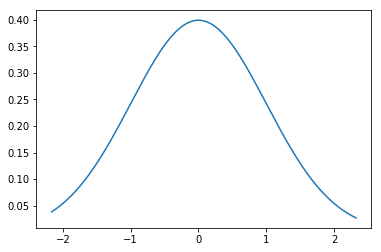

In [51]:
tocna = lambda x: stats.norm.pdf(x,0,1)
gauss = np.random.normal(0,1,n)

divergence = renyi_divergence_priblizkov(tocna, gauss, -100,100)

# WEIBULL PORAZDELITEV

Weibull porazdelitev, c=2.

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.01069095399169335
KL divergenca tocna || h_scott:   0.18223658551390085
KL divergenca tocna || h_sqrt:    0.24453025647285367
KL divergenca tocna || h_rice:    0.18202239512318072
KL divergenca tocna || h_sturges: 0.1777422854037573
KL divergenca tocna || h_fd:      0.18646413123122305
KL divergenca tocna || h_kl:      0.17709727714641674
KL divergenca tocna || h_eq10:    0.2003190133522736
KL divergenca tocna || h_eq20:    0.19103464048111732


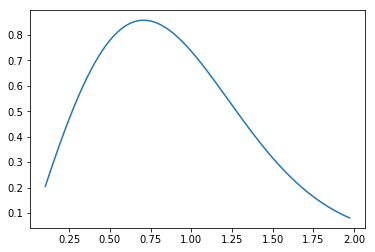

In [52]:
tocna = lambda x: stats.weibull_min.pdf(x,2)
wei = np.random.weibull(2,n)

divergence = renyi_divergence_priblizkov(tocna, wei, 0,100)

# PARETO PORAZDELITEV

Pareto porazdelitev, $\alpha$=2.

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.24044877176308982
KL divergenca tocna || h_scott:   0.650791383184582
KL divergenca tocna || h_sqrt:    0.4361031252754577
KL divergenca tocna || h_rice:    0.45649380611664714
KL divergenca tocna || h_sturges: 0.6821623142708844
KL divergenca tocna || h_fd:      0.909399074493423
KL divergenca tocna || h_kl:      0.34417536388872716
KL divergenca tocna || h_eq10:    0.18881761777345324
KL divergenca tocna || h_eq20:    0.10891899437017061


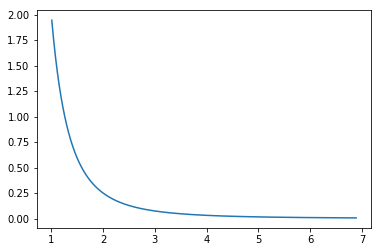

In [53]:
tocna = lambda x: stats.pareto.pdf(x,2)
par = np.random.pareto(2,n)+1

divergence = renyi_divergence_priblizkov(tocna, par, 1,100)

# BETA PORAZDELITVE

$$\alpha=0.5,\beta=0.5$$

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.19286066873325391
KL divergenca tocna || h_scott:   0.11008714495792424
KL divergenca tocna || h_sqrt:    0.07974302300636821
KL divergenca tocna || h_rice:    0.11060196399710061
KL divergenca tocna || h_sturges: 0.12270439198782661
KL divergenca tocna || h_fd:      0.15470057094415407
KL divergenca tocna || h_kl:      0.11956350022251805
KL divergenca tocna || h_eq10:    0.06430585312717099
KL divergenca tocna || h_eq20:    0.032324468772964375


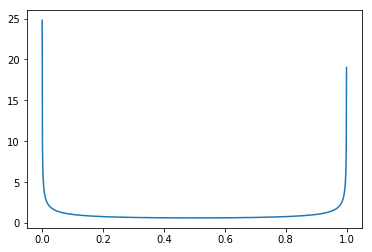

In [54]:
alpha, beta = (0.5,0.5)
tocna = lambda x: stats.beta.pdf(x,alpha,beta)
data = np.random.beta(alpha,beta,n)

divergence = renyi_divergence_priblizkov(tocna, data, 0,1)

$$\alpha=1,\beta=1$$

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.012557087426977219
KL divergenca tocna || h_scott:   0.03491286229715046
KL divergenca tocna || h_sqrt:    0.04691483018642499
KL divergenca tocna || h_rice:    0.03899958796479629
KL divergenca tocna || h_sturges: 0.034084079469022116
KL divergenca tocna || h_fd:      0.03491286229715046
KL divergenca tocna || h_kl:      0.034084079469022116
KL divergenca tocna || h_eq10:    0.035594615806045886
KL divergenca tocna || h_eq20:    0.04194085991600553


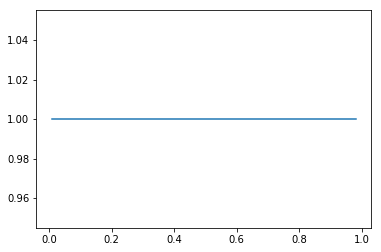

In [55]:
alpha, beta = (1,1)
tocna = lambda x: stats.beta.pdf(x,alpha,beta)
data = np.random.beta(alpha,beta,n)

divergence = renyi_divergence_priblizkov(tocna, data, 0,1)

$$\alpha=2,\beta=2$$

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.005430047732190311
KL divergenca tocna || h_scott:   0.10910517626281098
KL divergenca tocna || h_sqrt:    0.11151839048267957
KL divergenca tocna || h_rice:    0.10767819948204392
KL divergenca tocna || h_sturges: 0.10910517626281098
KL divergenca tocna || h_fd:      0.10809375187384816
KL divergenca tocna || h_kl:      0.10681497992016901
KL divergenca tocna || h_eq10:    0.11566902338691482
KL divergenca tocna || h_eq20:    0.11275198257840709


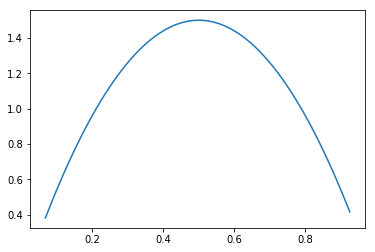

In [56]:
alpha, beta = (2,2)
tocna = lambda x: stats.beta.pdf(x,alpha,beta)
data = np.random.beta(alpha,beta,n)

divergence = renyi_divergence_priblizkov(tocna, data, 0,1)

$$\alpha=0.5,\beta=2$$

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.20994971051963882
KL divergenca tocna || h_scott:   0.13659734278659197
KL divergenca tocna || h_sqrt:    0.18803602462706762
KL divergenca tocna || h_rice:    0.14055134765449281
KL divergenca tocna || h_sturges: 0.11642422525308416
KL divergenca tocna || h_fd:      0.14188433282039897
KL divergenca tocna || h_kl:      0.13248854962719797
KL divergenca tocna || h_eq10:    0.04811748122046609
KL divergenca tocna || h_eq20:    0.04477989502131139


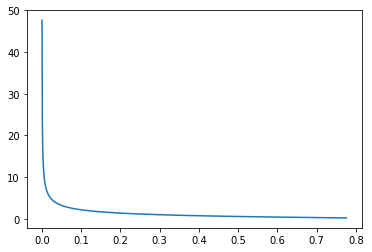

In [57]:
alpha, beta = (0.5,2)
tocna = lambda x: stats.beta.pdf(x,alpha,beta)
data = np.random.beta(alpha,beta,n)

divergence = renyi_divergence_priblizkov(tocna, data, 0,1)

$$\alpha=1,\beta=2$$

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.012701953371276378
KL divergenca tocna || h_scott:   0.23594338993048708
KL divergenca tocna || h_sqrt:    0.23916990421883932
KL divergenca tocna || h_rice:    0.23725472975664838
KL divergenca tocna || h_sturges: 0.2362030780777821
KL divergenca tocna || h_fd:      0.2335715781061417
KL divergenca tocna || h_kl:      0.2335715781061417
KL divergenca tocna || h_eq10:    0.24758458302033687
KL divergenca tocna || h_eq20:    0.2428635363056352


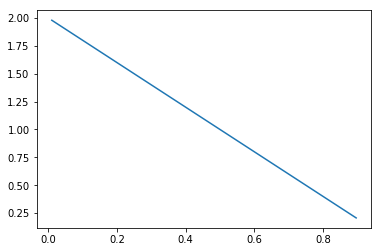

In [58]:
alpha, beta = (1,2)
tocna = lambda x: stats.beta.pdf(x,alpha,beta)
data = np.random.beta(alpha,beta,n)

divergence = renyi_divergence_priblizkov(tocna, data, 0,1)

$$\alpha=2,\beta=3$$

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

KL divergenca tocna || gkde:      0.00607314399545223
KL divergenca tocna || h_scott:   0.07449822652326245
KL divergenca tocna || h_sqrt:    0.0737145568259771
KL divergenca tocna || h_rice:    0.08057584018028252
KL divergenca tocna || h_sturges: 0.07449822652326245
KL divergenca tocna || h_fd:      0.076474927409606
KL divergenca tocna || h_kl:      0.07449822652326245
KL divergenca tocna || h_eq10:    0.09745187654515404
KL divergenca tocna || h_eq20:    0.08461337204222961


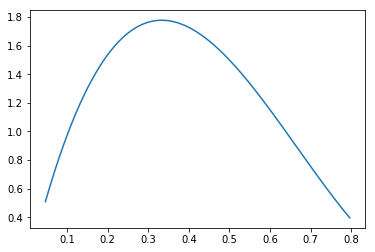

In [59]:
alpha, beta = (2,3)
tocna = lambda x: stats.beta.pdf(x,alpha,beta)
data = np.random.beta(alpha,beta,n)

divergence = renyi_divergence_priblizkov(tocna, data, 0,1)